In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow

In [3]:
path=pathy+'/data/tempsweep_no_diffpeak_2022-02-17-08-36-40'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]


for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_5/data2022-02-17-02-54-59.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_100/data2022-02-17-08-36-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_1/data2022-02-16-18-32-43.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_2/data2022-02-16-21-31-43.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_diffpeak_10/data2022-02-17-05-48-06.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_no_diffpeak_2022-02-17-08-36-40/tempsweep_no_dif

In [4]:
path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df2=pd.concat(frames).sort_values(['theta', 'nu'])

reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_diffpeak_2022-02-12-13-44-44/tempsweep_diffpeak_100/data2022-02-12-13-44-42.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_diffpeak_2022-02-12-13-44-44/tempsweep_diffpeak_1/data2022-02-12-00-41-11.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_diffpeak_2022-02-12-13-44-44/tempsweep_diffpeak_2/data2022-02-12-03-06-41.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_diffpeak_2022-02-12-13-44-44/tempsweep_diffpeak_3/data2022-02-12-05-46-15.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_diffpeak_2022-02-12-13-44-44/tempsweep_diffpeak_5/data2022-02-12-08-23-49.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_diffpeak_2022-02-12-13-44-44/tempsweep_diffpeak_10/data2022-02-12-11-02-35.h5


In [7]:
df2

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,1.891740,0.071517,2.607302,-0.006953,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_0.0,10.34
0,0.104720,0.000,1.483221,0.000468,2.606550,0.269448,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_6.0,10.34
0,0.209440,0.000,1.488630,0.029258,2.602114,0.544111,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_12.0,10.34
0,0.314159,0.000,1.485511,0.016035,2.584689,0.839635,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_18.0,10.34
0,0.418879,0.000,1.479902,0.012780,2.533708,1.136897,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_24.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.104720,205.766,5.289900,0.000517,2.606550,0.269448,100.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_6.0,10.34
199,0.209440,205.766,5.274475,0.000157,2.602114,0.544111,100.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_12.0,10.34
199,0.314159,205.766,5.278520,0.001038,2.584689,0.839635,100.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_18.0,10.34
199,0.418879,205.766,5.272748,0.001779,2.533708,1.136897,100.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_diffpeak_only_theta_24.0,10.34


[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0 [  1.   2.   3.   5.  10. 100.]
1 1 1 [  1.   2.   3.   5.  10. 100.]
2 0 2 [  1.   2.   3.   5.  10. 100.]
3 1 0 [  1.   2.   3.   5.  10. 100.]
4 0 1 [  1.   2.   3.   5.  10. 100.]
5 1 2 [  1.   2.   3.   5.  10. 100.]


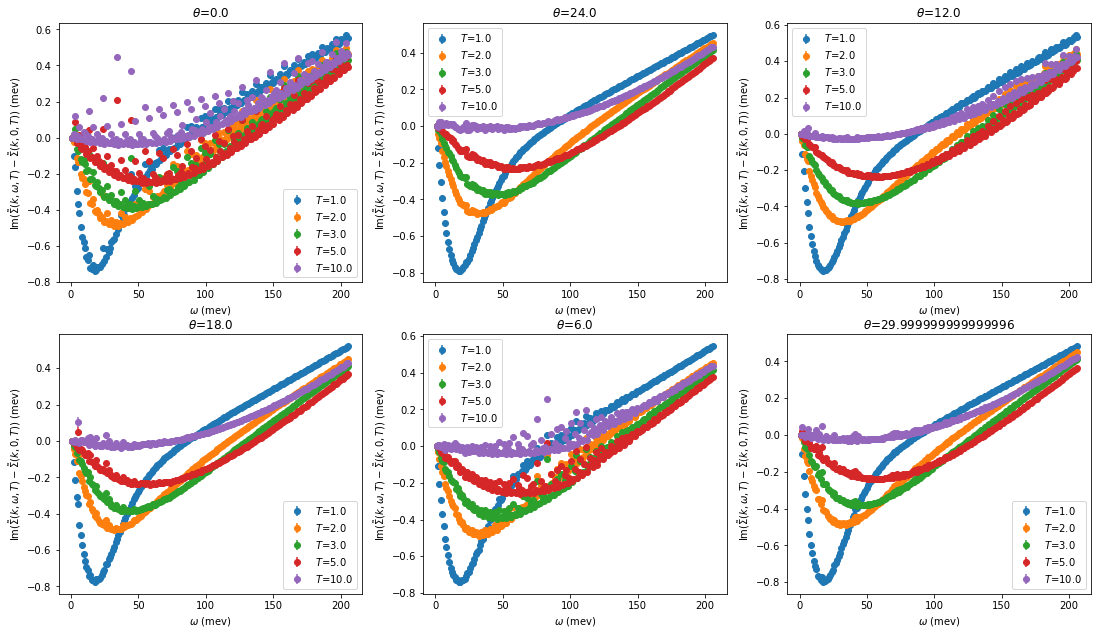

In [18]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=['freq','T'])
df2=df2.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df21=df.loc[(df['theta'] ==th )]
    df22=df2.loc[(df2['theta'] ==th )]
    Ts=df21['T'].unique()
    
    i=int(l%N)
    j=int((l%M))
    print(l,i,j,Ts)
    for T in [1.0,2.0,3.0,5.0,10.0]:
        
        df31=df21.loc[(df21['T'] ==T )]
        df32=df22.loc[(df22['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x1=df31['freq']
        y1=df31['SE']
        err1=df31['error']
        
        x2=df32['freq']
        y2=df32['SE']
        err2=df32['error']
        
        y=(y1[:]+y2[:])
        y=y-y[0]
            
        
        axis[i,j].errorbar(x1[1:],y[1:]+y[0]-y[1],yerr=err1[1:] ,   label=r'$T$='+str(T), fmt='o')
        
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')